In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Projects/Nuclear Physics GPT/Feature Engineering/nuclear_physics_final_df.csv', index_col=0).reset_index(drop=True)
df = df.sort_values('Neutrons')

target = 'Half-life Time'
targets = ['Half-life', 'Half-life Magnitude', 'Half-life Time']
targets.remove(target)

# Drop the unnecessary columns
artifical = df['Artificial'] > 0
df = df.drop(columns=targets+['Artificial'])

df = df.drop(columns=[column for column in df.columns if 'Binding' in column])
df = df.drop(columns=[column for column in df.columns if 'Mass' in column])

# Organizing Features
base_features = ['Protons', 'Neutrons', 'Atomic Weight']
transformation_features = ['Protons_log', 'Protons_reciprocal', 'Neutrons_log', 'Neutrons_reciprocal', 'Neutrons_power', 'Atomic Weight_log', 'Atomic Weight_reciprocal', 'Atomic Weight_power']
special_features = ['Abs(Z-N)/Atomic Weight', 'Abs(Z-N)/Atomic Weight_reciprocal', 'Z-N', 'Z-N_log', 'Z-N_reciprocal', 'Z/N', 'Z/N_power',
                    'Even Z', 'Even N', 'Even N-Z',
                    'Last Shell Filled', 'Last Shell Fill Ratio', 'Last Orbital Label Encoded (Complex)', 'Last Orbital Label Encoded (Simple)', 'Last Principal Quantum Number', 'Last Azimuthal Quantum Number Encoded',
                    'Is Magic Number', 'Magic Number', 'Closest Magic Number', 'Distance To Magic Number', 'Distance To Magic Number_abs']

ipm_features = [col for col in df.columns if 'IP_Model' in col]
ldm_features = [col for col in df.columns if 'LD_Model' in col]
fgm_features = [col for col in df.columns if 'FG_Model' in col]
cm_features = [col for col in df.columns if 'C_Model' in col]
tcsm_features = [col for col in df.columns if 'TCS_Model' in col]
ncsm_features = [col for col in df.columns if 'NCS_Model' in col]

df


,Protons,Protons_log,Protons_reciprocal,Neutrons,Neutrons_log,Neutrons_reciprocal,Neutrons_power,Atomic Weight,Atomic Weight_log,Atomic Weight_reciprocal,...,Modified Interaction Protons Neutrons_TCS_Model,Deformation Length_TCS_Model,Deformation Width_TCS_Model,Asymmetry Protons_TCS_Model,Asymmetry Neutrons_TCS_Model,Interaction Protons_NCS_Model,Interaction Neutrons_NCS_Model,Interaction Protons Neutrons_NCS_Model,Excitation Energy_NCS_Model,Higher Order Interactions_NCS_Model
0,1,0.693147,1.000000,0,0.000000,0.000000,0,1.007825,0.697052,0.992236,...,0,1.102862,0.902341,1,0,0,0,0,1,1
3268,3,1.386294,0.333333,0,0.000000,0.000000,0,3.021828,1.391737,0.330926,...,0,1.590313,1.301165,1,0,6,0,0,9,27
3502,4,1.609438,0.250000,0,0.000000,0.000000,0,4.029104,1.615242,0.248194,...,0,1.750366,1.432118,0,0,12,0,0,16,64
3503,5,1.791759,0.200000,0,0.000000,0.000000,0,5.036380,1.797804,0.198555,...,0,1.885525,1.542702,1,0,20,0,0,25,125
3504,6,1.945910,0.166667,0,0.000000,0.000000,0,6.043656,1.952127,0.165463,...,0,2.003669,1.639365,0,0,30,0,0,36,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,116,4.762174,0.008621,177,5.181784,0.005650,31329,295.377544,5.691634,0.003385,...,6556,7.325746,5.993792,0,1,13340,31152,20532,85849,25153757
3501,118,4.779123,0.008475,177,5.181784,0.005650,31329,297.392096,5.698408,0.003363,...,6705,7.342363,6.007388,0,1,13806,31152,20886,87025,25672375
3500,117,4.770685,0.008547,177,5.181784,0.005650,31329,296.384820,5.695027,0.003374,...,6630,7.334064,6.000597,1,1,13572,31152,20709,86436,25412184
3498,115,4.753590,0.008696,178,5.187386,0.005618,31684,295.378932,5.691639,0.003385,...,6525,7.325757,5.993801,1,0,13110,31506,20470,85849,25153757


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df[base_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

### FINAL TEST ###
cut_off = int(.7*len(df))
X_train, y_train = X[:cut_off], y[:cut_off]
X_test, y_test = X[cut_off:], y[cut_off:]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X

,Protons,Neutrons,Atomic Weight
0,1,0,1.007825
3268,3,0,3.021828
3502,4,0,4.029104
3503,5,0,5.036380
3504,6,0,6.043656
...,...,...,...
3264,116,177,295.377544
3501,118,177,297.392096
3500,117,177,296.384820
3498,115,178,295.378932


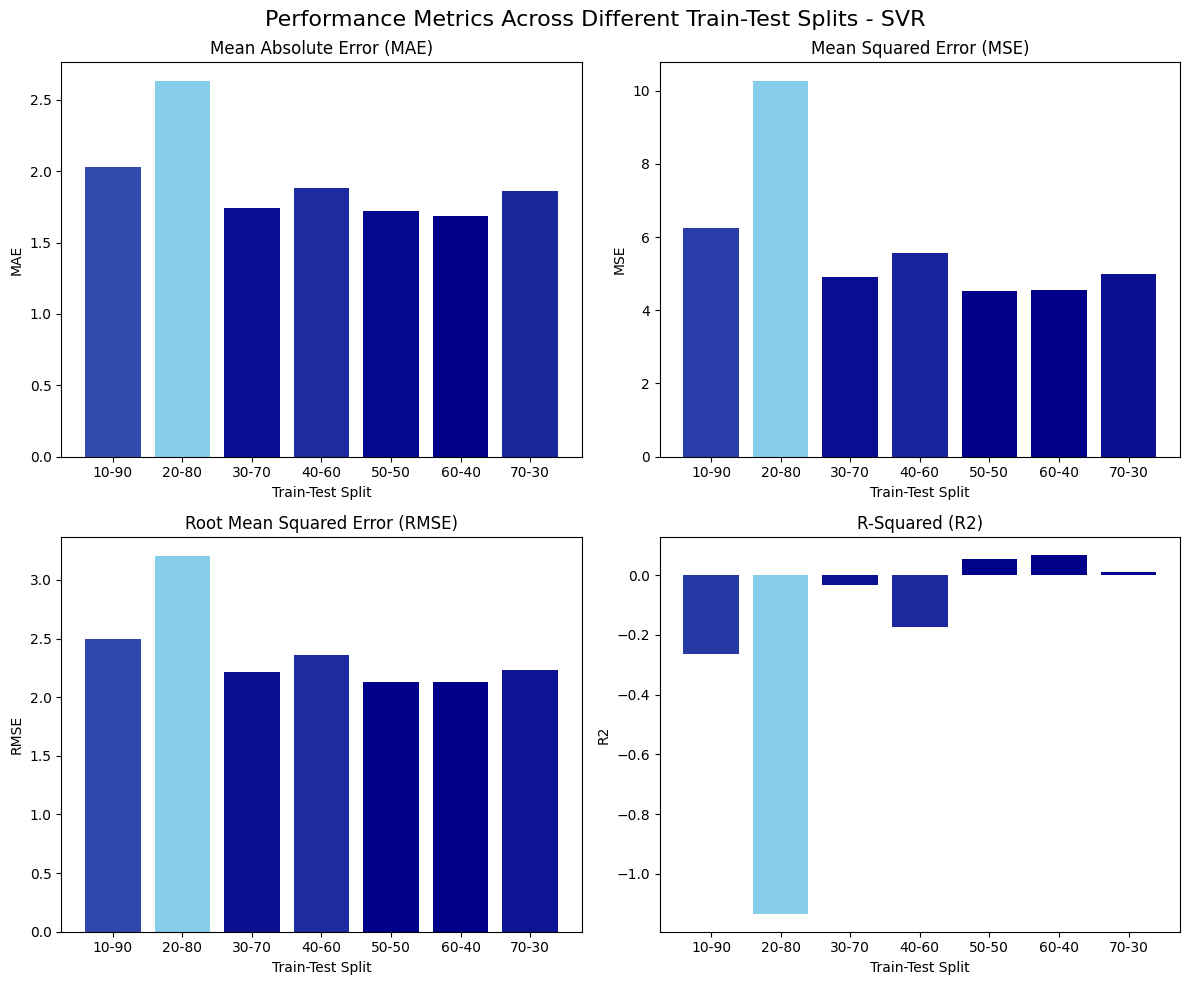

In [6]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor



X = df[base_features + transformation_features + special_features]
y = df[target]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize SVR model
model = SVR()

# Initialize metrics lists
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

# List of train-test splits
splits = [(0.1, 0.9), (0.2, 0.8), (.3, .7), (0.4, 0.6), (0.5, 0.5), (.6, .4), (0.7, 0.3)]
split_labels = ["10-90", "20-80", "30-70", "40-60", "50-50", "60-40", "70-30"]

# 5 Trials with different train-test splits
for train_ratio, test_ratio in splits:
    train_size = int(train_ratio * len(X))
    test_size = int(test_ratio * len(X))

    X_train, X_test = X_scaled[:train_size], X_scaled[train_size:train_size + test_size]
    y_train, y_test = y[:train_size], y[train_size:train_size + test_size]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Append to metrics lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

from matplotlib.colors import LinearSegmentedColormap

# Visualization with Bluish Theme Based on Metric Quality
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create a colormap for the bars
cmap = plt.get_cmap('Blues')

# Normalize the metrics for the colormap
norm_mae = plt.Normalize(min(mae_list), max(mae_list))
norm_mse = plt.Normalize(min(mse_list), max(mse_list))
norm_rmse = plt.Normalize(min(rmse_list), max(rmse_list))
norm_r2 = plt.Normalize(min(r2_list), max(r2_list))

# Function to get colors for bars (darker is better)
cmap = LinearSegmentedColormap.from_list("light_to_dark_blue", ["skyblue", "darkblue"])

def get_colors(metrics, norm, is_higher_better=False):
    if is_higher_better:
        return [cmap(norm(value)) for value in metrics]
    else:
        return [cmap(1 - norm(value)) for value in metrics]

# Plotting MAE
colors = get_colors(mae_list, norm_mae)
axes[0, 0].bar(split_labels, mae_list, color=colors)
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_xlabel('Train-Test Split')
axes[0, 0].set_ylabel('MAE')

# Plotting MSE
colors = get_colors(mse_list, norm_mse)
axes[0, 1].bar(split_labels, mse_list, color=colors)
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_xlabel('Train-Test Split')
axes[0, 1].set_ylabel('MSE')

# Plotting RMSE
colors = get_colors(rmse_list, norm_rmse)
axes[1, 0].bar(split_labels, rmse_list, color=colors)
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_xlabel('Train-Test Split')
axes[1, 0].set_ylabel('RMSE')

# Plotting R2 (higher is better, closer to 1)
colors = get_colors(r2_list, norm_r2, is_higher_better=True)
axes[1, 1].bar(split_labels, r2_list, color=colors)
axes[1, 1].set_title('R-Squared (R2)')
axes[1, 1].set_xlabel('Train-Test Split')
axes[1, 1].set_ylabel('R2')

fig.suptitle('Performance Metrics Across Different Train-Test Splits - SVR', fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-7-6e0a0e9d2ae3>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, **metrics}, ignore_index=True)
<ipython-input-7-6e0a0e9d2ae3>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, **metrics}, ignore_index=True)
<ipython-input-7-6e0a0e9d2ae3>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, **metrics}, ignore_index=True)
<ipython-input-7-6e0a0e9d2ae3>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, **metrics}, ign

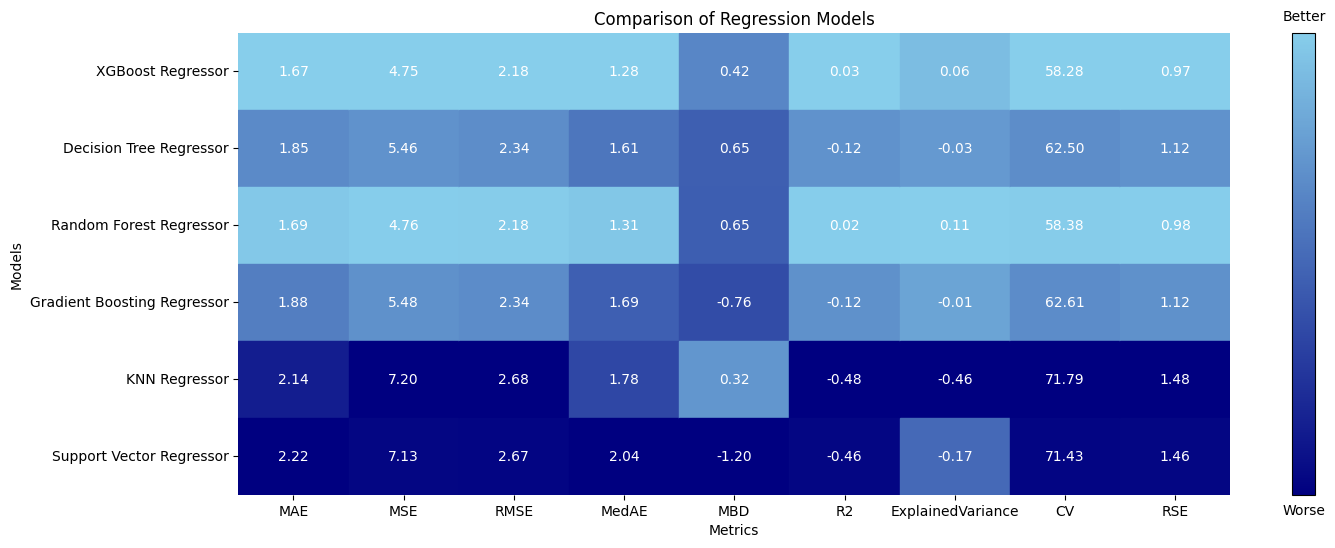

In [7]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
from sklearn.neighbors import KNeighborsRegressor

# Function to compute various metrics
def compute_metrics(y_true, y_pred):
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MedAE': median_absolute_error(y_true, y_pred),
        'MBD': np.mean(y_pred - y_true),
        'R2': r2_score(y_true, y_pred),
        'ExplainedVariance': explained_variance_score(y_true, y_pred),
        'CV': np.sqrt(mean_squared_error(y_true, y_pred)) / np.mean(y_true) * 100,
        'RSE': np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    }
    return metrics

# Initialize models
models = {
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'KNN Regressor': KNeighborsRegressor()
}

# Assuming X and y are your feature matrix and target vector
# X = df[feature_columns]
# y = df[target_column]

# 70-30 split for train-test
# Split the data into training and testing sets
X = df[base_features + transformation_features + special_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

### FINAL TEST ###
cut_off = int(.6*len(df))
X_train, y_train = X[:cut_off], y[:cut_off]
X_test, y_test = X[cut_off:], y[cut_off:]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'MedAE', 'MBD', 'R2', 'ExplainedVariance', 'CV', 'RSE'])

# Iterate over each model
for model_name, model in models.items():
    # Fit and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    metrics = compute_metrics(y_test, y_pred)

    # Append to results DataFrame
    results_df = results_df.append({'Model': model_name, **metrics}, ignore_index=True)

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of model names in the desired order
model_order = ['XGBoost Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'KNN Regressor', 'Support Vector Regressor']

# Sort the results_df according to the model_order
results_df['Model'] = pd.Categorical(results_df['Model'], categories=model_order, ordered=True)
results_df = results_df.sort_values('Model')

# Define metrics where lower values are better
lower_is_better = ['MAE', 'MSE', 'RMSE', 'MedAE', 'CV', 'RSE']

# Define metrics where higher values are better
higher_is_better = ['R2', 'ExplainedVariance']

# Define metrics where values closer to zero are better
closer_to_zero_is_better = ['MBD']

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("light_to_dark_blue", ["navy", "skyblue"])

plt.figure(figsize=(16, 6))

# Initialize the plot with white text annotations
ax = sns.heatmap(results_df.set_index('Model').astype(float), annot=True, fmt=".2f", cmap=cmap, cbar=False, annot_kws={"color": 'white'})

norm = plt.Normalize(0, 1)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add color bar
cbar = plt.colorbar(sm, ticks=[], orientation='vertical')  # Remove ticks

# Add annotation at the top of the color bar where the light color is
cbar.ax.text(.5, 1.05, 'Better', ha='center', va='top')
cbar.ax.text(.5, -0.05, 'Worse', ha='center', va='bottom')

# Loop through each metric (column) to set custom colors
for i, metric in enumerate(results_df.columns[1:]):  # Skip the 'Model' column
    values = results_df[metric].values

    if metric in lower_is_better:
        min_val, max_val = min(values), max(values)
    elif metric in higher_is_better:
        min_val, max_val = max(values), min(values)
    elif metric in closer_to_zero_is_better:
        min_val, max_val = 0, max(np.abs(values))

    for j, value in enumerate(values):
        if metric in closer_to_zero_is_better:
            norm_value = np.abs(value) / max_val
        else:
            norm_value = (value - min_val) / (max_val - min_val)

        bg_color = cmap(1 - norm_value)  # Reverse so that dark blue is better
        ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=True, color=bg_color))

# Add title and labels
plt.title("Comparison of Regression Models")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.show()



In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df[base_features + transformation_features + special_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

### FINAL TEST ###
cut_off = int(.65*len(df))
X_train, y_train = X[:cut_off], y[:cut_off]
X_test, y_test = X[cut_off:], y[cut_off:]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = XGBRegressor()
#model = KNeighborsRegressor()
#model = GradientBoostingRegressor()
model = SVR()
#model = RandomForestRegressor()


model.fit(X_train, y_train)

SVR()

In [9]:
# Normalize the entire dataset using the same scaler fitted on the training set
X_full = scaler.transform(X)
y = df[target]

# Predict on the entire dataset
y_pred_full = model.predict(X_full)
y_pred_full = [value if value > 0 else 0 for value in y_pred_full]
# Calculate the root mean squared error (RMSE) on the entire dataset
rmse_full = mean_squared_error(y, y_pred_full, squared=False)

print('Score for Entire Data: ' + str(rmse_full))

Score for Entire Data: 1.8335689109226332


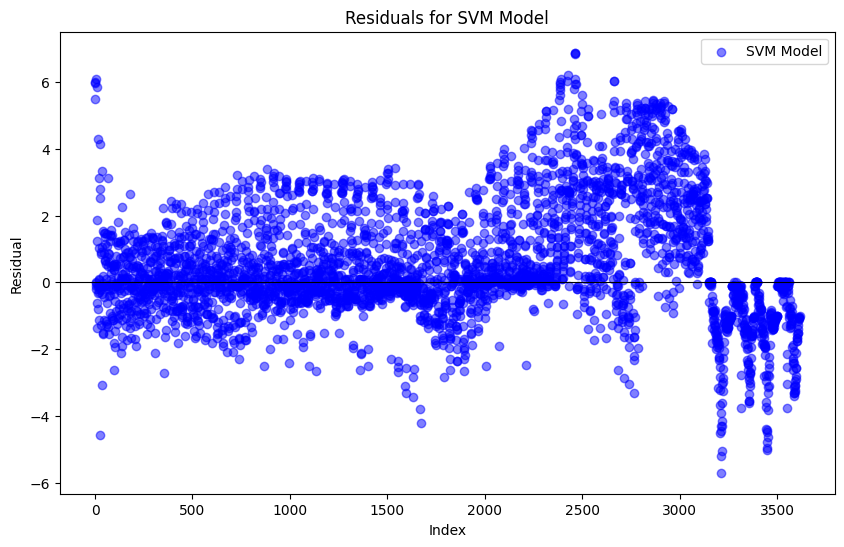

In [10]:
df_full = pd.DataFrame(X, columns=X.columns)
df_full['Actual'] = y
df_full['Predicted'] = y_pred_full

df_full['Residuals'] = df_full['Actual'] - df_full['Predicted']

plt.figure(figsize=(10, 6))
plt.scatter(df_full.index, df_full['Residuals'], c='blue', alpha=0.5, label='SVM Model')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Residuals for SVM Model')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.legend()
plt.show()


<ipython-input-11-b7ed4e8fa335>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax[1].scatter(df_full['Protons'][:cut_off], df_full['Neutrons'][:cut_off], cmap=cmap, norm=norm, alpha=.2, s=s, color='white')


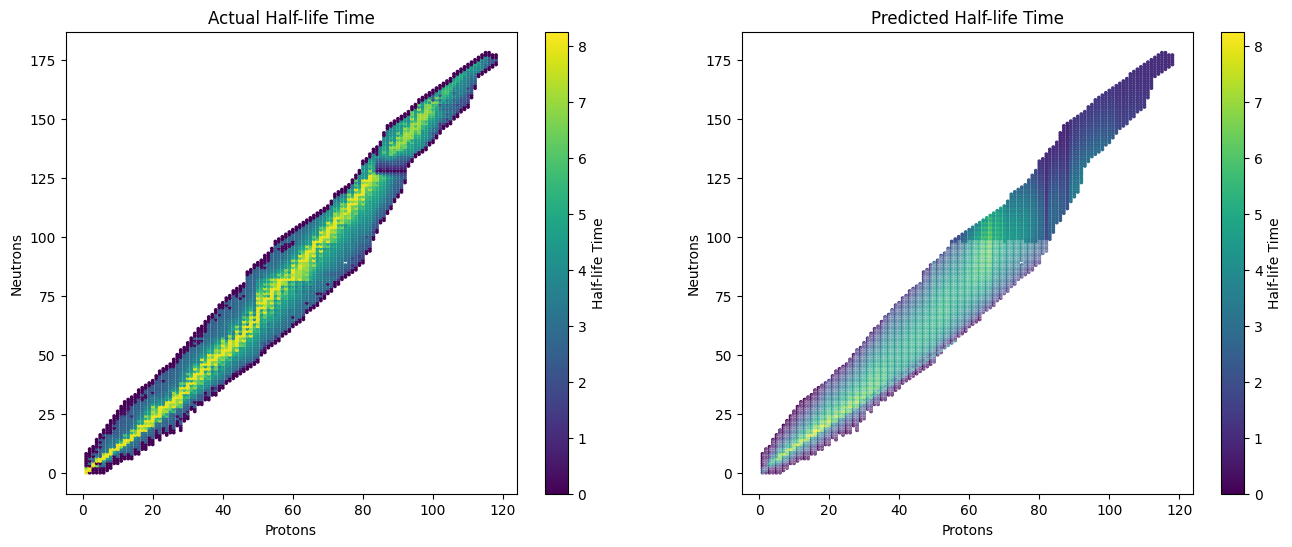

In [11]:
import matplotlib.colors as colors

# Create a dataframe for the full dataset
df_full = pd.DataFrame(X, columns=X.columns)
df_full['Actual'] = y
df_full['Predicted'] = y_pred_full

# Define the colormap
cmap = plt.cm.viridis  # or any other colormap you like

# Define the normalization
vmin = min(df_full['Actual'].min(), df_full['Predicted'].min())
vmax = max(df_full['Actual'].max(), df_full['Predicted'].max())
norm = colors.Normalize(vmin=vmin, vmax=vmax)
#norm = colors.LogNorm(vmin=df['Half-life Magnitude'].min()+1e-5, vmax=df['Half-life'].max())
s = 3

# Create the plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot the actual half-life magnitudes
scatter = ax[0].scatter(df_full['Protons'], df_full['Neutrons'], c=df_full['Actual'], cmap=cmap, norm=norm, alpha=1, s=s)
ax[0].set_title('Actual ' + target)
ax[0].set_xlabel('Protons')
ax[0].set_ylabel('Neutrons')
fig.colorbar(scatter, ax=ax[0], label=target)

# Plot the predicted half-life magnitudes
scatter = ax[1].scatter(df_full['Protons'], df_full['Neutrons'], c=df_full['Predicted'], cmap=cmap, norm=norm, alpha=1, s=s)
ax[1].set_title('Predicted ' + target)
ax[1].set_xlabel('Protons')
ax[1].set_ylabel('Neutrons')
fig.colorbar(scatter, ax=ax[1], label=target)

ax[1].scatter(df_full['Protons'][:cut_off], df_full['Neutrons'][:cut_off], cmap=cmap, norm=norm, alpha=.2, s=s, color='white')

plt.show()

Random Search --> Bayesian Optimization

In [12]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.9 MB/s eta 0:00:00


In [13]:
from skopt import BayesSearchCV
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt.space import Real, Categorical, Integer
from tqdm import tqdm

# Initialize a tqdm progress bar
pbar = tqdm(total=100, desc='Bayesian Optimization Progress')

# Callback function to update progress bar
def on_step(optim_result):
    pbar.update(1)

# Simplified hyperparameter space for Bayesian Optimization
param_space = {
    'C': Real(.01, 1000, prior='log-uniform'),
    'epsilon': Real(1, 1000.0, prior='log-uniform'),
    'kernel': Categorical(['linear','poly','sigmoid','rbf']),
    'degree': Integer(2, 10),
    'coef0': Real(0, 100, prior='uniform'),
}

# BayesSearchCV setup
bayes_search = BayesSearchCV(
    SVR(),
    param_space,
    n_iter=100,
    random_state=42,
    verbose=3,  # Set to 0 so tqdm can handle the progress display
    cv=3,
    scoring='r2'
)

# Assuming df, base_features, transformation_features, special_features, and target are defined
X = df[base_features + transformation_features + special_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

### FINAL TEST ###
cut_off = int(.7*len(df))
X_train, y_train = X[:cut_off], y[:cut_off]
X_test, y_test = X[cut_off:], y[cut_off:]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform Bayesian Optimization with progress bar callback
bayes_search.fit(X_train, y_train, callback=on_step)

# Close the progress bar
pbar.close()

# Best hyperparameters and corresponding performance
print("Best hyperparameters:", bayes_search.best_params_)
print("Best R^2 score:", bayes_search.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END C=169.0544956083249, coef0=98.06245983628227, degree=3, epsilon=61.55688293929657, kernel=rbf;, score=-0.124 total time=   0.0s
[CV 2/3] END C=169.0544956083249, coef0=98.06245983628227, degree=3, epsilon=61.55688293929657, kernel=rbf;, score=-0.010 total time=   0.0s
[CV 3/3] END C=169.0544956083249, coef0=98.06245983628227, degree=3, epsilon=61.55688293929657, kernel=rbf;, score=-0.001 total time=   0.0s


Bayesian Optimization Progress:  11%|█         | 11/100 [00:02<00:29,  2.97it/s]

KeyboardInterrupt: ignored

In [12]:
from skopt import BayesSearchCV
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt.space import Real, Categorical, Integer
from tqdm import tqdm
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from xgboost import XGBRegressor

# Initialize a tqdm progress bar
pbar = tqdm(total=100, desc='Bayesian Optimization Progress')

# Callback function to update progress bar
def on_step(optim_result):
    pbar.update(1)

param_space = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(1, 10),
    'subsample': Real(0.5, 1.0, 'uniform'),
    'colsample_bytree': Real(0.5, 1.0, 'uniform'),
    'gamma': Real(0, 1, 'uniform'),
    'reg_alpha': Real(0, 1, 'uniform'),
    'reg_lambda': Real(0, 1, 'uniform'),
}

# BayesSearchCV setup
bayes_search = BayesSearchCV(
    XGBRegressor(),
    param_space,
    n_iter=100,
    random_state=42,
    verbose=3,  # Set to 0 so tqdm can handle the progress display
    cv=3,
    scoring='r2'
)

# Assuming df, base_features, transformation_features, special_features, and target are defined
X = df[base_features + transformation_features + special_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

### FINAL TEST ###
cut_off = int(.7*len(df))
X_train, y_train = X[:cut_off], y[:cut_off]
X_test, y_test = X[cut_off:], y[cut_off:]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform Bayesian Optimization with progress bar callback
bayes_search.fit(X_train, y_train, callback=on_step)

# Close the progress bar
pbar.close()

# Best hyperparameters and corresponding performance
print("Best hyperparameters:", bayes_search.best_params_)
print("Best R^2 score:", bayes_search.best_score_)

Bayesian Optimization Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END colsample_bytree=0.705051979426657, gamma=0.7277257431773251, learning_rate=0.7340675018434776, max_depth=4, n_estimators=218, reg_alpha=0.4141186324855385, reg_lambda=0.350931334899144, subsample=0.8697521170952103;, score=-0.097 total time=   0.1s


Bayesian Optimization Progress:   1%|          | 1/100 [00:00<01:17,  1.27it/s]

[CV 2/3] END colsample_bytree=0.705051979426657, gamma=0.7277257431773251, learning_rate=0.7340675018434776, max_depth=4, n_estimators=218, reg_alpha=0.4141186324855385, reg_lambda=0.350931334899144, subsample=0.8697521170952103;, score=0.612 total time=   0.5s
[CV 3/3] END colsample_bytree=0.705051979426657, gamma=0.7277257431773251, learning_rate=0.7340675018434776, max_depth=4, n_estimators=218, reg_alpha=0.4141186324855385, reg_lambda=0.350931334899144, subsample=0.8697521170952103;, score=0.286 total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END colsample_bytree=0.9186941777766422, gamma=0.8833152773808622, learning_rate=0.04044084484117812, max_depth=10, n_estimators=266, reg_alpha=0.06231294084407148, reg_lambda=0.13830853827857517, subsample=0.676793698814209;, score=0.235 total time=   1.1s
[CV 2/3] END colsample_bytree=0.9186941777766422, gamma=0.8833152773808622, learning_rate=0.04044084484117812, max_depth=10, n_estimators=266, reg_alp

Bayesian Optimization Progress:   2%|▏         | 2/100 [00:06<05:36,  3.43s/it]

[CV 3/3] END colsample_bytree=0.9186941777766422, gamma=0.8833152773808622, learning_rate=0.04044084484117812, max_depth=10, n_estimators=266, reg_alpha=0.06231294084407148, reg_lambda=0.13830853827857517, subsample=0.676793698814209;, score=0.627 total time=   2.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END colsample_bytree=0.7224162561505759, gamma=0.9187225216693771, learning_rate=0.01620758534278905, max_depth=5, n_estimators=97, reg_alpha=0.45366534380629897, reg_lambda=0.15544805405054332, subsample=0.8757762656702482;, score=0.257 total time=   0.9s
[CV 2/3] END colsample_bytree=0.7224162561505759, gamma=0.9187225216693771, learning_rate=0.01620758534278905, max_depth=5, n_estimators=97, reg_alpha=0.45366534380629897, reg_lambda=0.15544805405054332, subsample=0.8757762656702482;, score=0.434 total time=   1.6s


Bayesian Optimization Progress:   3%|▎         | 3/100 [00:10<06:31,  4.04s/it]

[CV 3/3] END colsample_bytree=0.7224162561505759, gamma=0.9187225216693771, learning_rate=0.01620758534278905, max_depth=5, n_estimators=97, reg_alpha=0.45366534380629897, reg_lambda=0.15544805405054332, subsample=0.8757762656702482;, score=0.573 total time=   2.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END colsample_bytree=0.9061979941786817, gamma=0.1718715613965607, learning_rate=0.1570703295827246, max_depth=8, n_estimators=181, reg_alpha=0.09545503921499346, reg_lambda=0.7558005328358816, subsample=0.9363151766549711;, score=0.165 total time=   3.4s
[CV 2/3] END colsample_bytree=0.9061979941786817, gamma=0.1718715613965607, learning_rate=0.1570703295827246, max_depth=8, n_estimators=181, reg_alpha=0.09545503921499346, reg_lambda=0.7558005328358816, subsample=0.9363151766549711;, score=0.572 total time=   2.0s


Bayesian Optimization Progress:   4%|▍         | 4/100 [00:17<08:21,  5.22s/it]

[CV 3/3] END colsample_bytree=0.9061979941786817, gamma=0.1718715613965607, learning_rate=0.1570703295827246, max_depth=8, n_estimators=181, reg_alpha=0.09545503921499346, reg_lambda=0.7558005328358816, subsample=0.9363151766549711;, score=0.630 total time=   1.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END colsample_bytree=0.8997767208035865, gamma=0.43802918644092337, learning_rate=0.11304216699488043, max_depth=7, n_estimators=276, reg_alpha=0.717031151159837, reg_lambda=0.42417807246068207, subsample=0.8251420508738814;, score=0.150 total time=   1.1s
[CV 2/3] END colsample_bytree=0.8997767208035865, gamma=0.43802918644092337, learning_rate=0.11304216699488043, max_depth=7, n_estimators=276, reg_alpha=0.717031151159837, reg_lambda=0.42417807246068207, subsample=0.8251420508738814;, score=0.616 total time=   1.5s


KeyboardInterrupt: ignored

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.initializers import he_normal, glorot_normal
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

def build_model(hyperparameters):
    model = Sequential()
    input_shape = hyperparameters['input_shape']

    # Initial layer with L2 regularization and weight initialization
    model.add(Dense(hyperparameters['layer_sizes'][0], input_shape=(input_shape,), activation=hyperparameters['activations'][0], kernel_initializer=hyperparameters['weight_initializer']))

    # Batch normalization after the first layer
    if hyperparameters['batch_normalization']:
        model.add(BatchNormalization())

    # Hidden layers with Dropout
    for i in range(1, hyperparameters['n_layers']):
        model.add(Dense(hyperparameters['layer_sizes'][i], activation=hyperparameters['activations'][i], kernel_initializer=hyperparameters['weight_initializer']))
        model.add(Dropout(hyperparameters['dropout_rate']))

    # Output layer (linear activation for regression)
    model.add(Dense(1, activation='linear', kernel_initializer=hyperparameters['weight_initializer']))

    # Optimizer with learning rate and momentum (if SGD)
    if hyperparameters['optimizer'] == 'Adam':
        optimizer = Adam(learning_rate=hyperparameters['learning_rate'])
    else:
        optimizer = SGD(learning_rate=hyperparameters['learning_rate'], momentum=hyperparameters['momentum'])

    # Compile the model
    model.compile(optimizer=optimizer, loss=hyperparameters['loss'])

    return model

def cross_val_score_model(model, X, y, n_splits=5, epochs=10, batch_size=32):
    kf = KFold(n_splits=n_splits)
    scores = []

    X = np.asarray(X)
    y = np.asarray(y)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        y_pred = model.predict(X_test)

        score = r2_score(y_test, y_pred)
        scores.append(score)

    return np.mean(scores)

# Assuming df, base_features, transformation_features, special_features, and target are defined
X = df[base_features + transformation_features + special_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

### FINAL TEST ###
cut_off = int(.7*len(df))
X_train, y_train = X[:cut_off], y[:cut_off]
X_test, y_test = X[cut_off:], y[cut_off:]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define your hyperparameter space
n_features = X_train.shape[1]
hyperparameter_space = {
    'n_layers': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'layer_sizes': [],
    'activations': ['relu', 'tanh', 'sigmoid'],
    'loss': ['mean_squared_error', 'mean_absolute_error'],
    'optimizer': ['Adam', 'SGD'],
    'dropout_rate': [0.3, 0.4, 0.5],
    'learning_rate': [0.01, 0.005, 0.001],
    'momentum': [0.2, 0.5, 0.9],
    'epochs': [10, 20, 30, 40, 50, 100],
    'batch_size': [8, 16, 32, 64],
    'batch_normalization': [True, False],
    'weight_initializer': ['he_normal', 'glorot_normal', 'uniform'],
    'input_shape': [n_features]  # Updated to match your data
}

def generate_cnn_layer_sizes(n_features, n_layers):
    layer_sizes = [n_features]
    max_features_list = [32, 64, 128]
    max_features = random.choice(max_features_list)  # Randomly select a maximum number of features

    # Double the size until max_features
    while layer_sizes[-1] < max_features and len(layer_sizes) < n_layers:
        next_layer_size = layer_sizes[-1] * 2
        layer_sizes.append(next_layer_size)

    # Add a random number of layers with max_features
    num_max_layers = random.randint(1, max(n_layers-4, 1))  # Randomly choose between 1 and 4 max_feature layers
    layer_sizes.extend([max_features] * num_max_layers)

    # Start halving
    while len(layer_sizes) < n_layers:
        next_layer_size = layer_sizes[-1] // 2
        layer_sizes.append(max(next_layer_size, 1))

    # Truncate to n_layers and return
    return layer_sizes[:n_layers]

def random_search_with_logging(X, y, hyperparameter_space, n_iter=20, n_splits=5):
    best_score = -np.inf  # Initialize with a very low value
    best_hyperparameters = None

    # Initialize DataFrame to log the results
    log_df = pd.DataFrame(columns=['iteration', 'score', 'hyperparameters'])

    for i in range(n_iter):

        n_layers = random.choice(hyperparameter_space['n_layers'])
        layer_sizes = generate_cnn_layer_sizes(n_features, n_layers)
        activations = random.choices(hyperparameter_space['activations'], k=n_layers)  # `random.choices` allows repetition
        optimizer = random.choice(hyperparameter_space['optimizer'])
        loss = random.choice(hyperparameter_space['loss'])
        dropout_rate = random.choice(hyperparameter_space['dropout_rate'])
        learning_rate = random.choice(hyperparameter_space['learning_rate'])
        momentum = random.choice(hyperparameter_space['momentum'])
        epochs = random.randint(10,100)
        batch_size = random.randint(1,500)
        batch_normalization = random.choice(hyperparameter_space['batch_normalization'])
        weight_initializer = random.choice(hyperparameter_space['weight_initializer'])

        input_shape = hyperparameter_space['input_shape'][0]  # Replace with the number of features in your dataset

        # Construct hyperparameters
        hyperparameters = {
            'n_layers': n_layers,
            'layer_sizes': layer_sizes,
            'activations': activations,
            'optimizer': optimizer,
            'loss': loss,
            'dropout_rate': dropout_rate,
            'learning_rate': learning_rate,
            'momentum': momentum,
            'epochs': epochs,
            'batch_size': batch_size,
            'batch_normalization': batch_normalization,
            'weight_initializer': weight_initializer,
            'input_shape': input_shape
        }

        print(hyperparameters)

        # Build and evaluate model
        model = build_model(hyperparameters)
        score = cross_val_score_model(model, X, y, n_splits=n_splits, epochs=epochs, batch_size=batch_size)

        # Update best score and hyperparameters if needed
        if score > best_score:
            best_score = score
            best_hyperparameters = hyperparameters

        # Log the iteration results to DataFrame
        log_df.loc[i] = [i+1, score, hyperparameters]

        print(f"Iteration {i+1}/{n_iter} - Best Score: {best_score}", f" | Score: {score}", i)

    # Save the log DataFrame to a CSV file
    log_df.to_csv('random_search_log.csv', index=False)

    return best_score, best_hyperparameters, log_df

# Assuming X_train, y_train, and hyperparameter_space are already defined
#best_score, best_hyperparameters, log_df = random_search_with_logging(X_train, y_train, hyperparameter_space, n_iter=1)




In [404]:
[('C', 2.214796051716602), ('coef0', 100.0), ('degree', 2), ('epsilon', 0.03299607085309482), ('kernel', 'rbf')]
[('C', 5.625807592907616), ('coef0', 100.0), ('degree', 8), ('epsilon', 3.316045969595396), ('kernel', 'rbf')]

[('colsample_bytree', 0.5), ('gamma', 0.0), ('learning_rate', 0.04145234994394483), ('max_depth', 6), ('n_estimators', 162), ('reg_alpha', 0.0), ('reg_lambda', 0.0), ('subsample', 0.5948327073164456)]


log_df.sort_values('score', ascending=False)

best_hyperparameters = {'n_layers': 2,
 'layer_sizes': [X_train.shape[1], X_train.shape[1]*2],
 'activations': ['sigmoid', 'relu'],
 'optimizer': 'SGD',
 'loss': 'mean_squared_error',
 'dropout_rate': 0.3,
 'learning_rate': 0.01,
 'momentum': 0.9,
 'epochs': 50,
 'batch_size': 32,
 'batch_normalization': False,
 'weight_initializer': 'he_normal',
 'input_shape': X_train.shape[1]}

best_hyperparameters_1 = {'n_layers': 6,
                        'layer_sizes': [X_train.shape[1], X_train.shape[1]*2, X_train.shape[1]*2, X_train.shape[1], X_train.shape[1]//2, X_train.shape[1]//4],
                        'activations': ['relu', 'relu', 'tanh', 'sigmoid', 'tanh', 'tanh'],
                        'optimizer': 'Adam',
                        'loss': 'mean_squared_error',
                        'dropout_rate': 0.3,
                        'learning_rate': 0.0001,
                        'momentum': 0.9,
                        'epochs': 65,
                        'batch_size': 32,
                        'batch_normalization': True,
                        'weight_initializer': 'he_normal',
                        'input_shape': X_train.shape[1]}
best_hyperparameters

{'n_layers': 2,
 'layer_sizes': [32, 64],
 'activations': ['sigmoid', 'relu'],
 'optimizer': 'SGD',
 'loss': 'mean_squared_error',
 'dropout_rate': 0.3,
 'learning_rate': 0.01,
 'momentum': 0.9,
 'epochs': 50,
 'batch_size': 32,
 'batch_normalization': False,
 'weight_initializer': 'he_normal',
 'input_shape': 32}

In [400]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
from sklearn.neural_network import MLPRegressor


X = df[base_features + transformation_features + special_features]
y = df[target]

### FINAL TEST ###
cut = .9
cut_off = int(cut*len(df))
X_train, y_train = X[:cut_off], y[:cut_off]
X_test, y_test = X[cut_off:], y[cut_off:]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#model = SVR()
#model = XGBRegressor()
#model = build_model(best_hyperparameters)

#model = SVR(**bayes_search.best_params_)
#model = SVR(C=.5625807592907616, coef0=100.0, degree=8, epsilon=0.3316045969595396, kernel='rbf')
#model = XGBRegressor(learning_rate=0.04145234994394483, n_estimators=1062, max_depth=60, subsample=0.5948327073164456,
                     #colsample_bytree=.5, gamma=0.0, reg_alpha=0.0, reg_lambda=0.0)

#model.fit(X_train, y_train)


model = build_model(best_hyperparameters)
model.fit(X_train, y_train, epochs=2500, batch_size=best_hyperparameters['batch_size'], verbose=1)
#model.fit(X_train, y_train, epochs=50, batch_size=best_hyperparameters['batch_size'], verbose=1)

# Normalize the entire dataset using the same scaler fitted on the training set
X_full = scaler.transform(X)
y = df[target]


# Predict on the entire dataset
y_pred_full = model.predict(X_full)
y_pred_full = [value if value > 0 else 0 for value in y_pred_full]

mae = mean_absolute_error(y[cut_off:], y_pred_full[cut_off:])
mse = mean_squared_error(y[cut_off:], y_pred_full[cut_off:])
#rmse = mean_squared_error(y, y_pred_full, squared=False)
r2 = r2_score(y[cut_off:], y_pred_full[cut_off:])

print('Mean Absolute Error (MAE): ' + str(mae))
print('Mean Squared Error (MSE): ' + str(mse))
#print('Root Mean Squared Error (RMSE): ' + str(rmse))
print('R-squared (Coefficient of Determination): ' + str(r2))
#bayes_search.best_params_


Streaming output truncated to the last 5000 lines.
Epoch 3/2500
102/102 [==============================] - 1s 12ms/step - loss: 10.5626
Epoch 4/2500
102/102 [==============================] - 1s 13ms/step - loss: 8.9986
Epoch 5/2500
102/102 [==============================] - 1s 10ms/step - loss: 8.1232
Epoch 6/2500
102/102 [==============================] - 1s 7ms/step - loss: 7.6485
Epoch 7/2500
102/102 [==============================] - 1s 7ms/step - loss: 7.0856
Epoch 8/2500
102/102 [==============================] - 1s 7ms/step - loss: 6.9080
Epoch 9/2500
102/102 [==============================] - 0s 4ms/step - loss: 6.5779
Epoch 10/2500
102/102 [==============================] - 0s 4ms/step - loss: 6.5478
Epoch 11/2500
102/102 [==============================] - 0s 4ms/step - loss: 6.4129
Epoch 12/2500
102/102 [==============================] - 0s 4ms/step - loss: 6.2033
Epoch 13/2500
102/102 [==============================] - 0s 4ms/step - loss: 6.3142
Epoch 14/2500
102/102 [=====

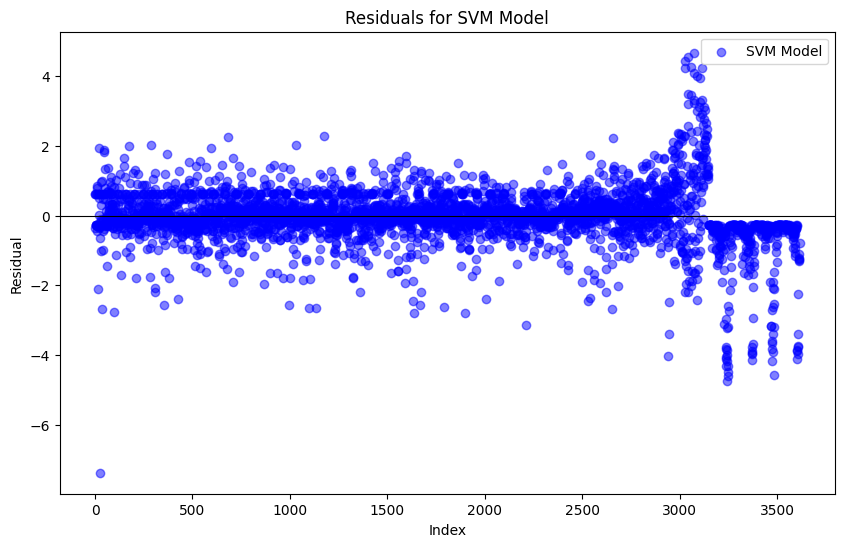

In [401]:
df_full = pd.DataFrame(X, columns=X.columns)
df_full['Actual'] = y
df_full['Predicted'] = y_pred_full

df_full['Residuals'] = df_full['Actual'] - df_full['Predicted']

plt.figure(figsize=(10, 6))
plt.scatter(df_full.index, df_full['Residuals'], c='blue', alpha=0.5, label='SVM Model')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Residuals for SVM Model')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.legend()
plt.show()

<ipython-input-402-390609eb6741>:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax[1].scatter(df_full['Protons'][:cut_off], df_full['Neutrons'][:cut_off], cmap=cmap, norm=norm, alpha=.2, s=s, color='white')


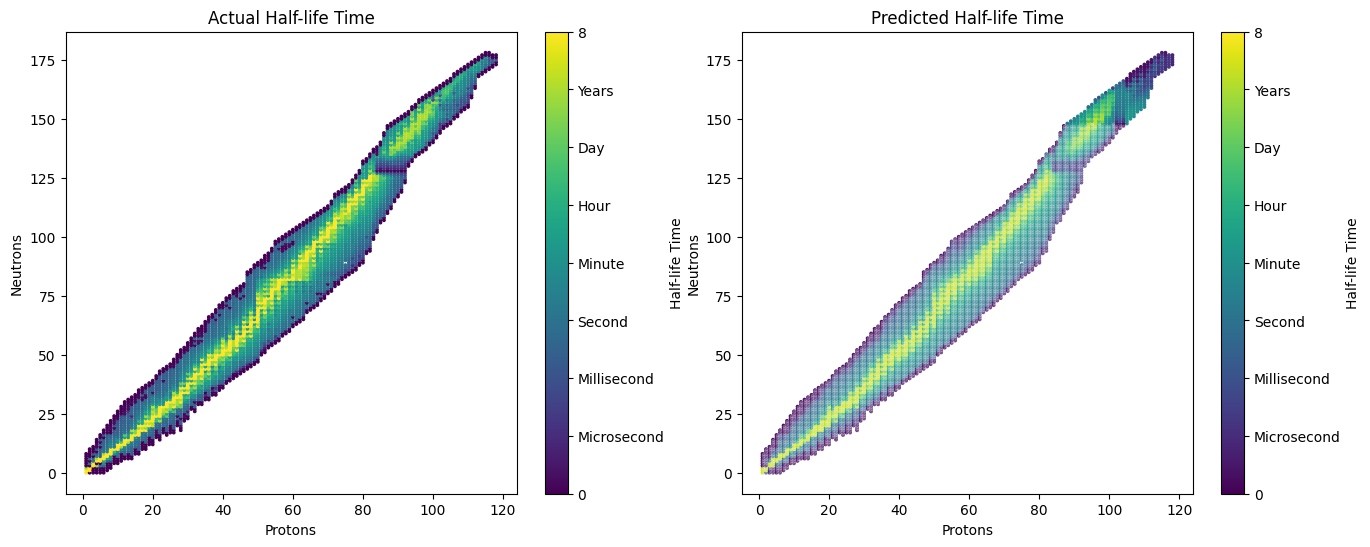

In [402]:
import matplotlib.colors as colors

# Create a dataframe for the full dataset
df_full = pd.DataFrame(X, columns=X.columns)
df_full['Actual'] = y
df_full['Predicted'] = y_pred_full

# Define the colormap
cmap = plt.cm.viridis  # or any other colormap you like

# Define the normalization
vmin = min(df_full['Actual'].min(), df_full['Predicted'].min())
vmax = max(df_full['Actual'].max(), df_full['Predicted'].max())
norm = colors.Normalize(vmin=vmin, vmax=vmax)
#norm = colors.LogNorm(vmin=df['Half-life Magnitude'].min()+1e-5, vmax=df['Half-life'].max())
s = 3

# Create the plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot the actual half-life magnitudes
scatter = ax[0].scatter(df_full['Protons'], df_full['Neutrons'], c=df_full['Actual'], cmap=cmap, norm=norm, alpha=1, s=s)
ax[0].set_title('Actual ' + target)
ax[0].set_xlabel('Protons')
ax[0].set_ylabel('Neutrons')
# Create colorbar and get its object
cbar = fig.colorbar(scatter, ax=ax[0], label=target)

# Explicitly set ticks and tick labels
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
cbar.set_ticklabels(['0', 'Microsecond', 'Millisecond', 'Second', 'Minute', 'Hour', 'Day', 'Years', '8'])

# Plot the predicted half-life magnitudes
scatter = ax[1].scatter(df_full['Protons'], df_full['Neutrons'], c=df_full['Predicted'], cmap=cmap, norm=norm, alpha=1, s=s)
ax[1].set_title('Predicted ' + target)
ax[1].set_xlabel('Protons')
ax[1].set_ylabel('Neutrons')

# Create colorbar and get its object
cbar = fig.colorbar(scatter, ax=ax[1], label=target)

# Explicitly set ticks and tick labels
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
cbar.set_ticklabels(['0', 'Microsecond', 'Millisecond', 'Second', 'Minute', 'Hour', 'Day', 'Years', '8'])


ax[1].scatter(df_full['Protons'][:cut_off], df_full['Neutrons'][:cut_off], cmap=cmap, norm=norm, alpha=.2, s=s, color='white')

plt.show()

In [26]:
# Bar Chart of Regular, Features, CV Selection Xgboost vs Kfold together.
# Finally, Compare Neural Network

df_full = pd.DataFrame()
df_full['Protons'] = X['Protons']
df_full['Neutrons'] = X['Neutrons']
df_full['Measured Data'] = y

['Independent Particle Model', 'Liquid Drop Model', 'Fermi Gas Model', 'Collective Model', 'Two-Center Shell Model', 'No-Core Shell Model']

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
from sklearn.neural_network import MLPRegressor

new_features = {'Base Model':'', 'Independent Particle Model':ipm_features, 'Liquid Drop Model':ldm_features,
                'Fermi Gas Model':fgm_features, 'Collective Model':cm_features, 'Two-Center Shell Model':tcsm_features,
                'No-Core Shell Model':ncsm_features}

for new_feature in new_features:

  X = df[base_features + transformation_features + special_features]
  if new_feature != 'Base Model':
    X = df[base_features + transformation_features + special_features + new_features[new_feature]]

  y = df[target]

  ### FINAL TEST ###
  cut = .9
  cut_off = int(cut*len(df))
  X_train, y_train = X[:cut_off], y[:cut_off]
  X_test, y_test = X[cut_off:], y[cut_off:]

  X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)
  # Normalize the features using StandardScaler
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)


  best_hyperparameters = {'n_layers': 4,
                          'layer_sizes': [X_train.shape[1], X_train.shape[1]*2, X_train.shape[1]*2, X_train.shape[1]],
                          'activations': ['sigmoid', 'relu', 'relu', 'relu'],
                          'optimizer': 'SGD',
                          'loss': 'mean_squared_error',
                          'dropout_rate': 0.3,
                          'learning_rate': 0.01,
                          'momentum': 0.9,
                          'epochs': 50,
                          'batch_size': 32,
                          'batch_normalization': False,
                          'weight_initializer': 'he_normal',
                          'input_shape': X_train.shape[1]}
  model = build_model(best_hyperparameters)
  model.fit(X_train, y_train, epochs=500, batch_size=best_hyperparameters['batch_size'], verbose=0)

  X_full = scaler.transform(X)
  y = df[target]


  y_pred_full = model.predict(X_full)
  y_pred_full = [value if value > 0 else 0 for value in y_pred_full]
  r2 = r2_score(y[cut_off:], y_pred_full[cut_off:])

  df_full[new_feature] = [i for i in y_pred_full]
  print(new_feature, r2)


114/114 [==============================] - 0s 2ms/step
Base Model 0.2881182291552382
114/114 [==============================] - 0s 2ms/step
Independent Particle Model 0.168338156359354
114/114 [==============================] - 0s 2ms/step
Liquid Drop Model 0.02213474271750393
114/114 [==============================] - 0s 2ms/step
Fermi Gas Model 0.016433823983412532
114/114 [==============================] - 0s 3ms/step
Collective Model 0.043404258176813815
114/114 [==============================] - 0s 2ms/step
Two-Center Shell Model -0.1927731067105245
114/114 [==============================] - 0s 2ms/step
No-Core Shell Model -0.19251611040087035


Errors

In [33]:
# Create the figure
fig = plt.figure(figsize=(40, 30))
#fig.suptitle('Error Map of Various Theoretical Models', fontsize=70, y=0.98)  # Adjust 'y' for vertical positioning

# Adjusted vertical positions for top and bottom rows
top_row_bottom = 0.55
bottom_row_bottom = -0.5
square_size = .8
font_size = 60*3


s = 12*9
# Top row plots
for i, col in enumerate(['Measured Data', 'Base Model']):
    ax = plt.axes([0.1 + i*(square_size*1.5 + 0.05), top_row_bottom, square_size*1.5, square_size*1.5])
    sc = ax.scatter(df_full['Protons'], df_full['Neutrons'], c=df_full[col], cmap=plt.cm.viridis, vmin=0, vmax=8, s=s*6)
    ax.set_title(col, fontsize=font_size)
    ax.set_xlabel('Protons', fontsize=font_size*.75)
    ax.set_ylabel('Neutrons', fontsize=font_size*.75)
    cbar = plt.colorbar(sc, ax=ax)
    ax.tick_params(axis='both', labelsize=font_size*.6)
    cbar.ax.tick_params(labelsize=font_size*.6)

# Bottom row plots
for i, col in enumerate(['Independent Particle Model', 'Liquid Drop Model', 'Fermi Gas Model', 'Collective Model', 'Two-Center Shell Model', 'No-Core Shell Model']):
    ax = plt.axes([0.1 + i*(square_size*.8 + 0.05), bottom_row_bottom, square_size*.8, square_size])
    sc = ax.scatter(df_full['Protons'], df_full['Neutrons'], c=abs(df_full[col]-df_full['Measured Data'])**2, cmap='RdYlGn_r', vmin=0, vmax=8, s=s)
    ax.set_title(col, fontsize=font_size*.75)
    cbar = plt.colorbar(sc, ax=ax)
    ax.tick_params(axis='both', labelsize=font_size*.5)
    cbar.ax.tick_params(labelsize=font_size*.4)

#plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()


Output hidden; open in https://colab.research.google.com to view.

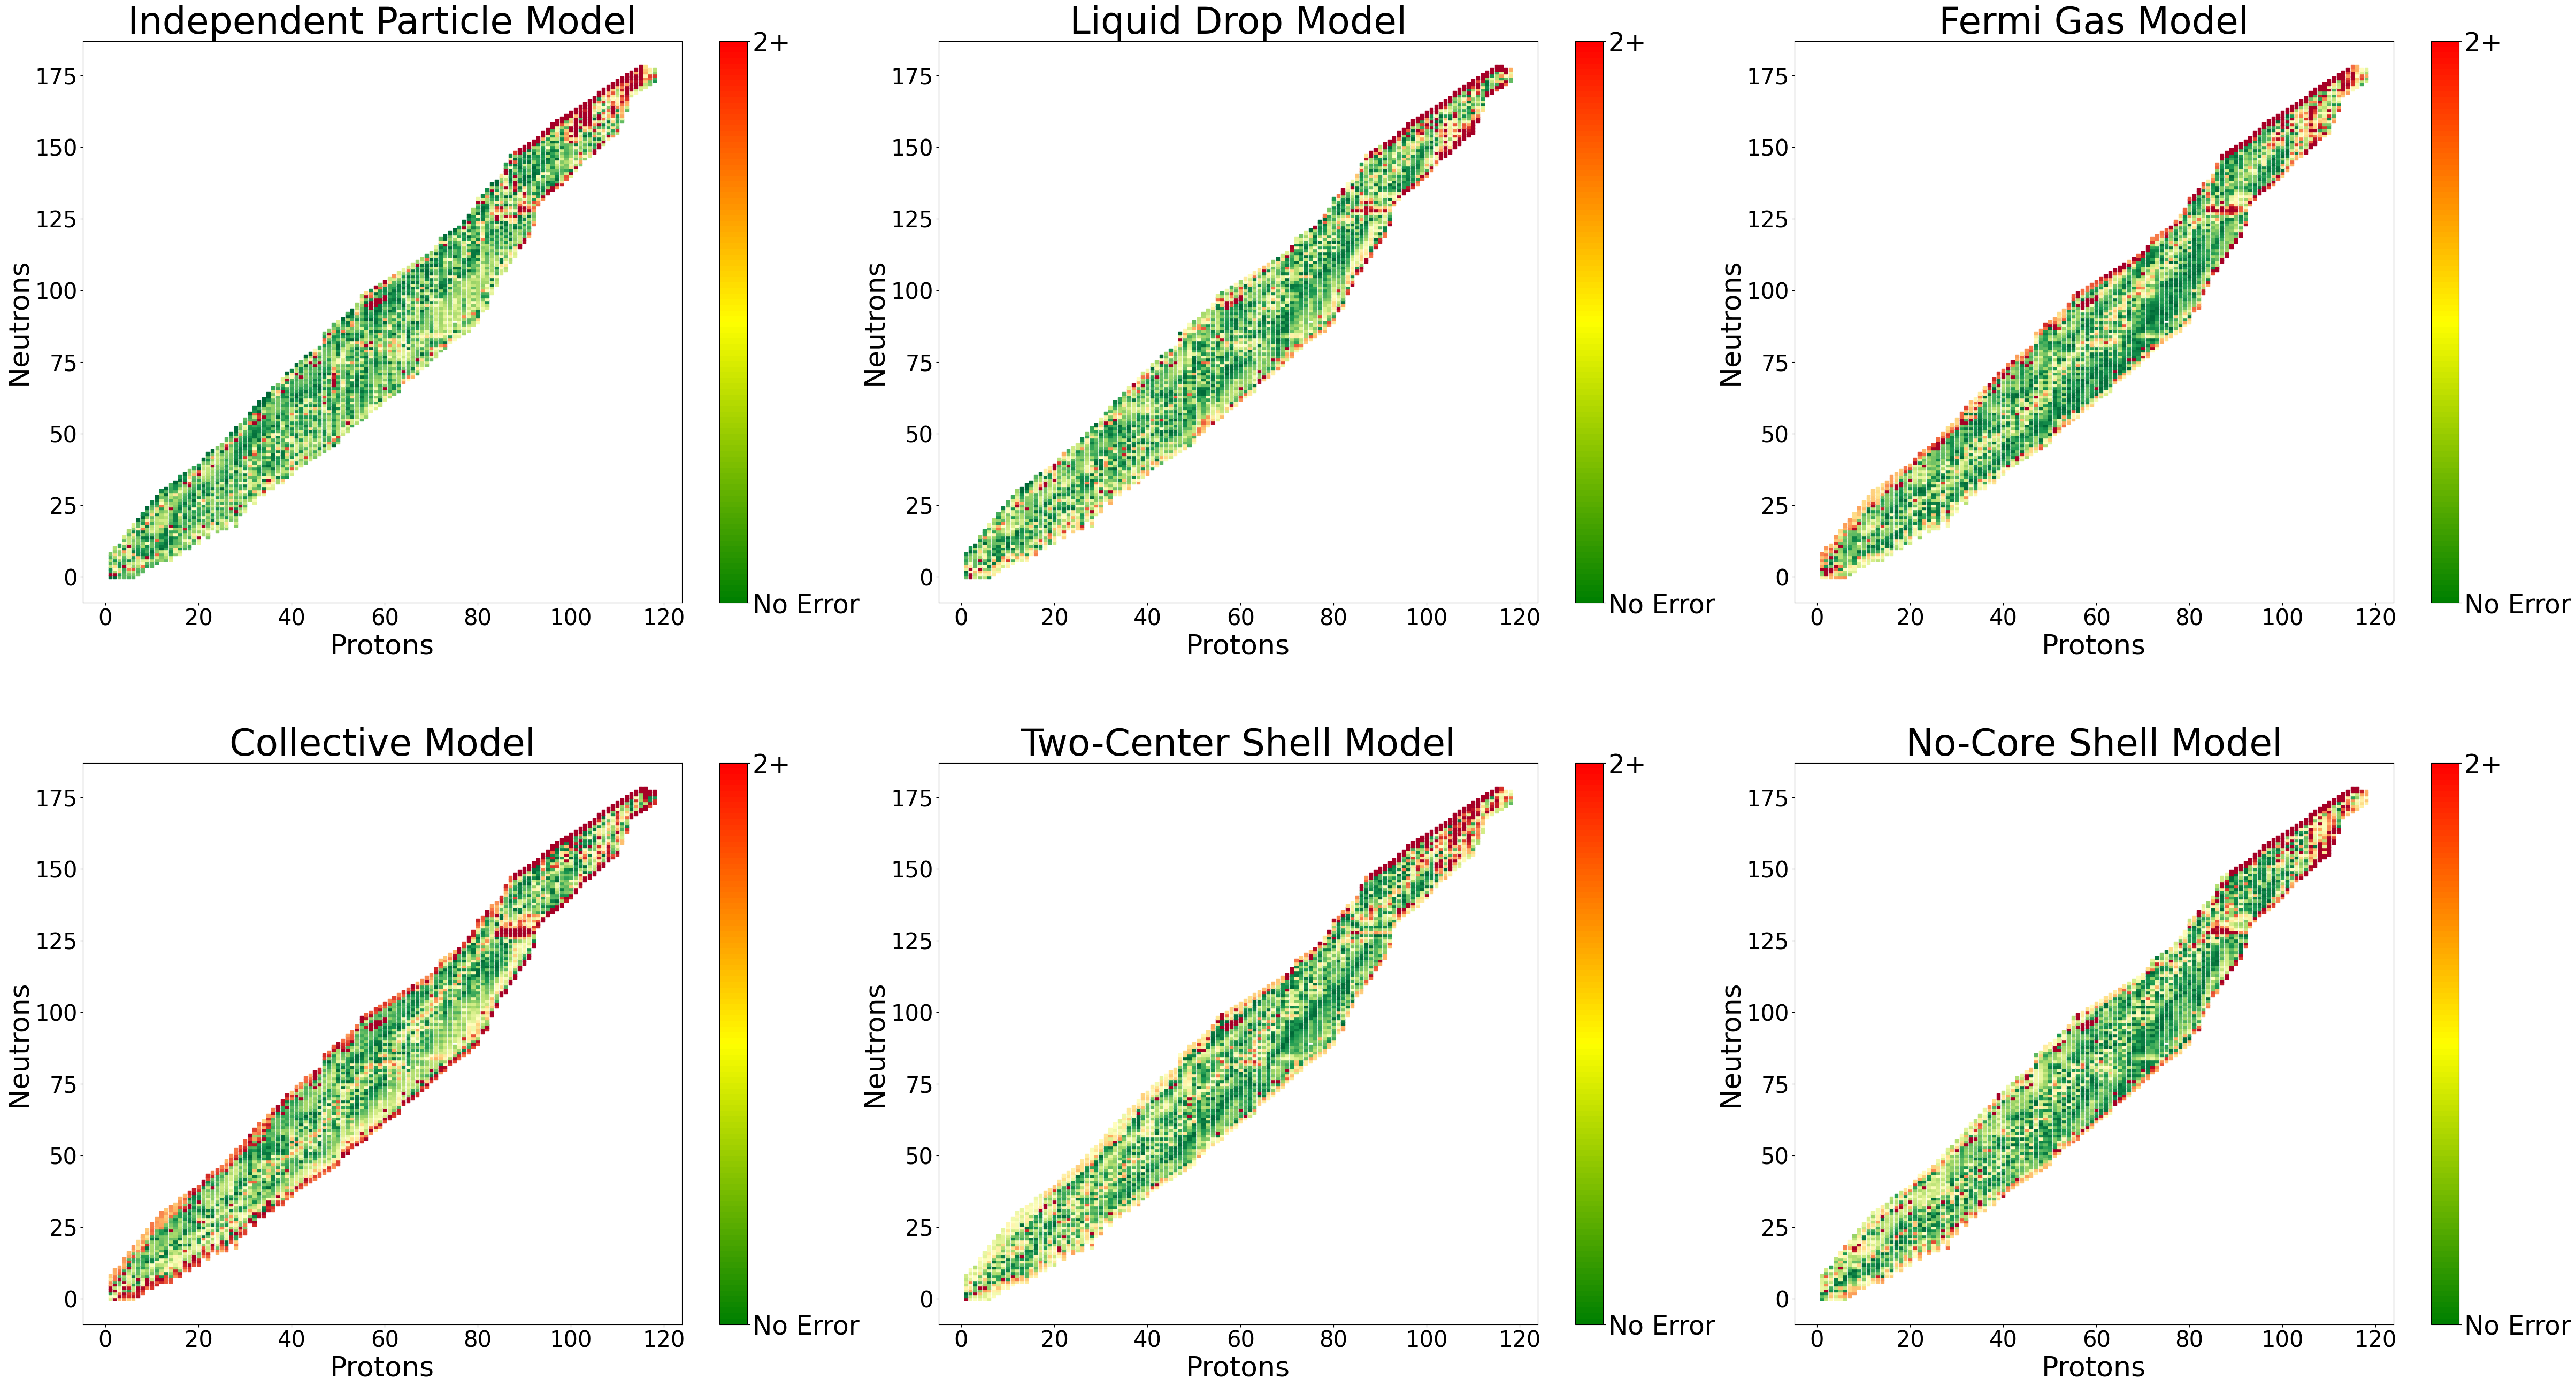

In [73]:
from math import e
import matplotlib.pyplot as plt


# Create the figure
fig = plt.figure(figsize=(40, 30))


# Layout parameters
square_size = 0.35  # size of each square plot
font_size = 50  # base font size
s = 20  # point size for scatter plots

# Models to plot
models = ['Independent Particle Model', 'Liquid Drop Model', 'Fermi Gas Model', 'Collective Model', 'Two-Center Shell Model', 'No-Core Shell Model']

# Create the plots in 2 rows of 3
for i, col in enumerate(models):
    row = i // 3  # Determines the row index: 0 for the first row, 1 for the second row
    col_idx = i % 3  # Determines the column index: 0, 1, or 2

    # Positioning
    x_position = 0.1 + col_idx * (square_size + 0.05)
    y_position = 0.4 - row * (square_size + 0.1)

    ax = plt.axes([x_position, y_position, square_size, square_size])

    error_values = abs(df_full[col]-df_full['Measured Data'])

    # Plot points that are exactly 0 in green
    ax.scatter(df_full['Protons'], df_full['Neutrons'], c=error_values, cmap='RdYlGn_r', vmin=0, vmax=2, s=s, marker='s')

    ax.set_title(col, fontsize=font_size*.75)
    ax.set_title(col, fontsize=font_size)
    ax.set_xlabel('Protons', fontsize=font_size * 0.75)
    ax.set_ylabel('Neutrons', fontsize=font_size * 0.75)

    cbar = plt.colorbar(sc, ax=ax)
    ax.tick_params(axis='both', labelsize=font_size * 0.6)
    cbar.ax.tick_params(labelsize=font_size * 0.7)

    cbar.set_ticks([0, 8])
    cbar.set_ticklabels(['No Error', '2+'])


plt.show()


Predictions

In [34]:
# Create the figure
fig = plt.figure(figsize=(40, 30))
#fig.suptitle('Error Map of Various Theoretical Models', fontsize=70, y=0.98)  # Adjust 'y' for vertical positioning

# Adjusted vertical positions for top and bottom rows
top_row_bottom = 0.55
bottom_row_bottom = -0.5
square_size = .8
font_size = 60*3


s = 12*9
# Top row plots
for i, col in enumerate(['Measured Data', 'Base Model']):
    ax = plt.axes([0.1 + i*(square_size*1.5 + 0.05), top_row_bottom, square_size*1.5, square_size*1.5])
    sc = ax.scatter(df_full['Protons'], df_full['Neutrons'], c=df_full[col], cmap=plt.cm.viridis, vmin=0, vmax=8, s=s*6)
    ax.set_title(col, fontsize=font_size)
    ax.set_xlabel('Protons', fontsize=font_size*.75)
    ax.set_ylabel('Neutrons', fontsize=font_size*.75)
    cbar = plt.colorbar(sc, ax=ax)
    ax.tick_params(axis='both', labelsize=font_size*.6)
    cbar.ax.tick_params(labelsize=font_size*.6)

# Bottom row plots
for i, col in enumerate(['Independent Particle Model', 'Liquid Drop Model', 'Fermi Gas Model', 'Collective Model', 'Two-Center Shell Model', 'No-Core Shell Model']):
    ax = plt.axes([0.1 + i*(square_size*.8 + 0.05), bottom_row_bottom, square_size*.8, square_size])
    sc = ax.scatter(df_full['Protons'], df_full['Neutrons'], c=df_full[col], cmap=plt.cm.viridis, vmin=0, vmax=8, s=s)
    ax.set_title(col, fontsize=font_size*.75)
    cbar = plt.colorbar(sc, ax=ax)
    ax.tick_params(axis='both', labelsize=font_size*.5)
    cbar.ax.tick_params(labelsize=font_size*.4)

#plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ipm_features = [col for col in df.columns if 'IP_Model' in col]
ldm_features = [col for col in df.columns if 'LD_Model' in col]
fgm_features = [col for col in df.columns if 'FG_Model' in col]
cm_features = [col for col in df.columns if 'C_Model' in col]
tcsm_features = [col for col in df.columns if 'TCS_Model' in col]
ncsm_features = [col for col in df.columns if 'NCS_Model' in col]